# This task help us to understand that how PCA makes our work easy while choosing number of clusters

In [314]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sns
import scipy.cluster.hierarchy as sch # to draw dendrogram
from sklearn.cluster import AgglomerativeClustering # for model building using Hierarchical Clustering
from sklearn.cluster import KMeans # for model nuilding using kmeans clustering

In [315]:
df = pd.read_csv("Universities.csv")
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


# EDA

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [317]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [318]:
df.shape

(25, 7)

In [319]:
#Consider only numerical column
data = df.iloc[:,1:]
data

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [320]:
#Normalising the data set(numerical column)
uni_data = scale(data)
uni_data

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [321]:
pca = PCA()
pca_values = pca.fit_transform(uni_data)
pca_values

array([[-1.00987445e+00, -1.06430962e+00,  8.10663051e-02,
         5.69506350e-02, -1.28754245e-01, -3.46496377e-02],
       [-2.82223781e+00,  2.25904458e+00,  8.36828830e-01,
         1.43844644e-01, -1.25961913e-01, -1.80703168e-01],
       [ 1.11246577e+00,  1.63120889e+00, -2.66786839e-01,
         1.07507502e+00, -1.91814148e-01,  3.45679459e-01],
       [-7.41741217e-01, -4.21874699e-02,  6.05008649e-02,
        -1.57208116e-01, -5.77611392e-01,  1.09163092e-01],
       [-3.11912064e-01, -6.35243572e-01,  1.02405189e-02,
         1.71363672e-01,  1.27261287e-02, -1.69212696e-02],
       [-1.69669089e+00, -3.44363283e-01, -2.53407507e-01,
         1.25643278e-02, -5.26606002e-02, -2.71661600e-02],
       [-1.24682093e+00, -4.90983662e-01, -3.20938196e-02,
        -2.05643780e-01,  2.93505340e-01, -7.80119838e-02],
       [-3.38749784e-01, -7.85168589e-01, -4.93584829e-01,
         3.98563085e-02, -5.44978619e-01, -1.55371653e-01],
       [-2.37415013e+00, -3.86538883e-01,  1.160

In [322]:
#The amount of variance that each PCA explains is (?)
pca.explained_variance_

array([4.80425527, 0.81960016, 0.29850193, 0.17060428, 0.12948562,
       0.02755274])

In [323]:
#The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [324]:
#cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

In [325]:
pca.components_

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

In [326]:
data.columns

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

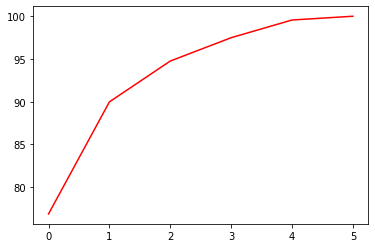

In [327]:
#variance plot for PCA components obtained
plt.plot(var1,color="red")

In [328]:
pca_values[:,0:1]

array([[-1.00987445],
       [-2.82223781],
       [ 1.11246577],
       [-0.74174122],
       [-0.31191206],
       [-1.69669089],
       [-1.24682093],
       [-0.33874978],
       [-2.37415013],
       [-1.40327739],
       [-1.72610332],
       [-0.45085748],
       [ 0.04023814],
       [ 3.23373034],
       [-2.23626502],
       [ 5.17299212],
       [-1.69964377],
       [ 4.578146  ],
       [ 0.82260312],
       [-0.09776213],
       [ 1.9631826 ],
       [-0.54228894],
       [ 0.53222092],
       [ 3.54869664],
       [-2.30590032]])

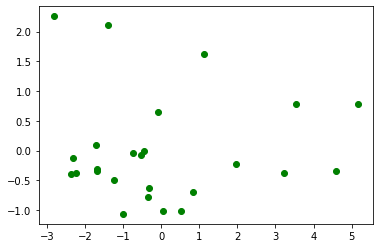

In [329]:
#plot betn PC1 and PC2
x = pca_values[:,0]
y = pca_values[:,1]
z = pca_values[:,2]
#w = pca_values[:,3]
plt.scatter(x,y,color = 'green')

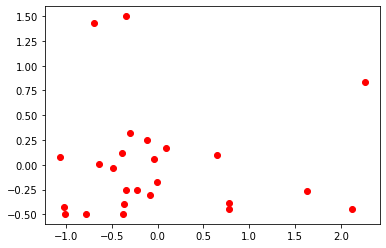

In [330]:
plt.scatter(y,z,color = 'red')

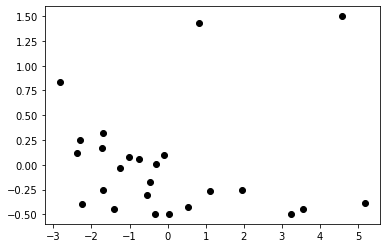

In [331]:
plt.scatter(x,z, color = 'black')

In [332]:
#plt.scatter(w,z, color = 'brown')

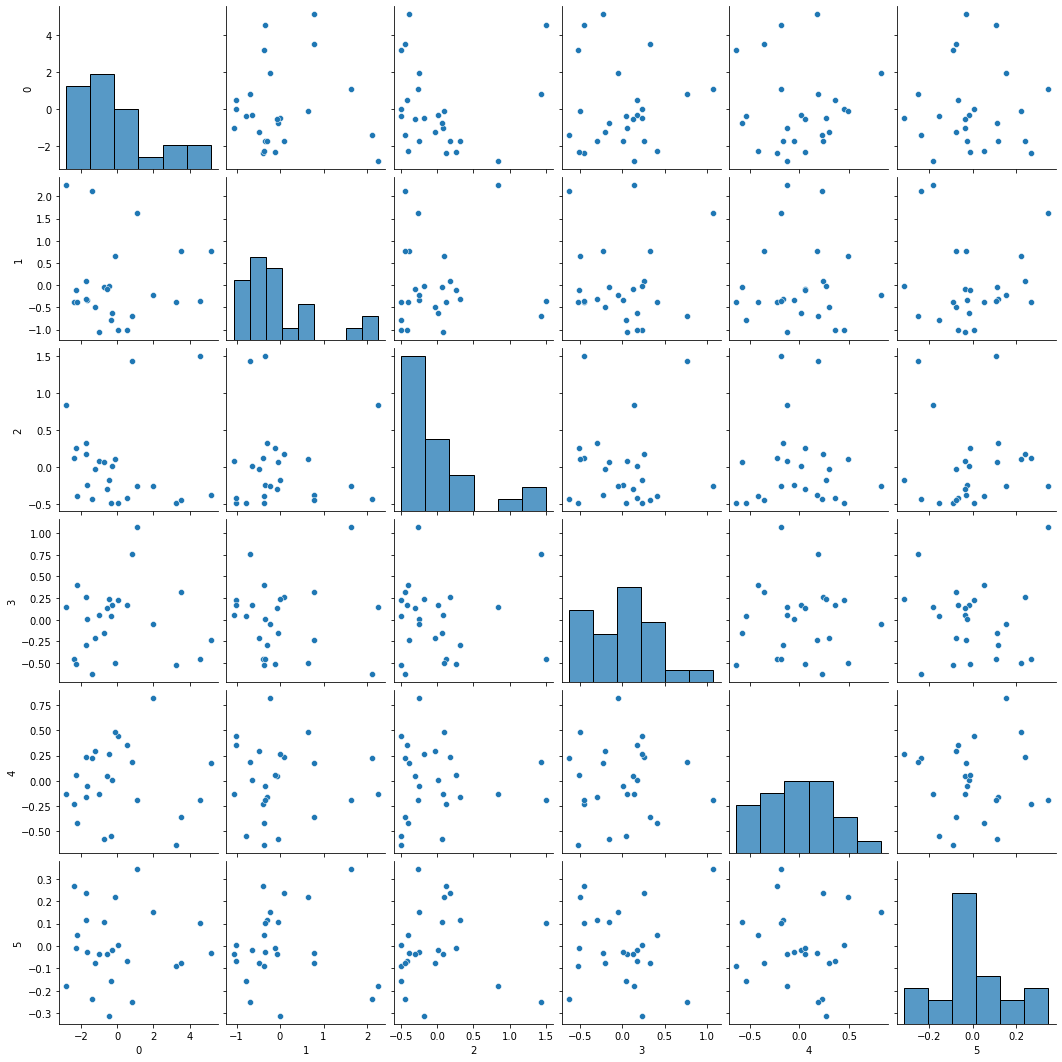

In [333]:
sns.pairplot(pd.DataFrame(pca_values))
#observe that there is no correlation check with original pairplot just below of this pairplot

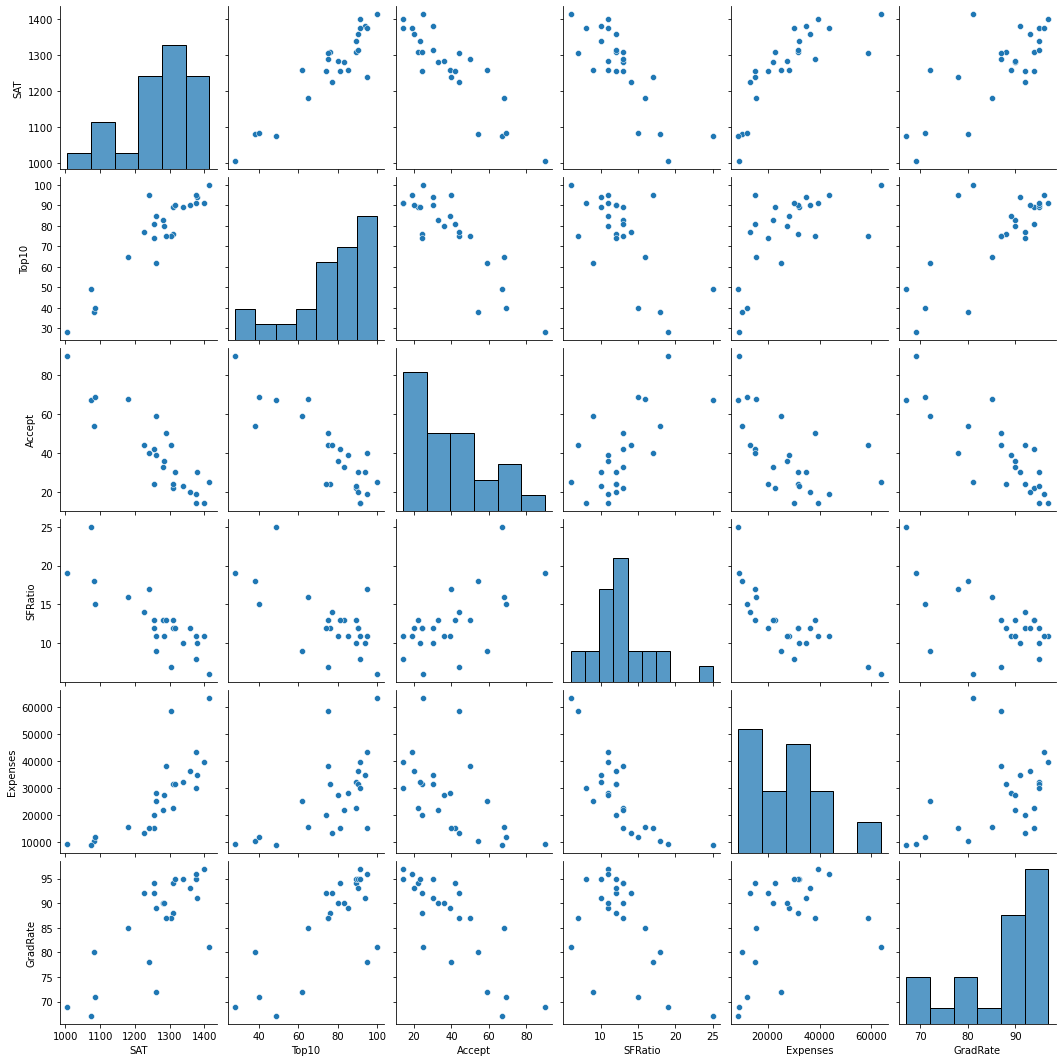

In [334]:
sns.pairplot(data)
#few are hughly coorelated like SAT and top 10

In [335]:
finalDF = pd.concat([pd.DataFrame(pca_values[:,0:3],
                                 columns = ['pc1','pc2','pc3']),
                    df], axis = 1)
finalDF

,pc1,pc2,pc3,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,-1.009874,-1.064310,0.081066,Brown,1310,89,22,13,22704,94
1,-2.822238,2.259045,0.836829,CalTech,1415,100,25,6,63575,81
2,1.112466,1.631209,-0.266787,CMU,1260,62,59,9,25026,72
3,-0.741741,-0.042187,0.060501,Columbia,1310,76,24,12,31510,88
4,-0.311912,-0.635244,0.010241,Cornell,1280,83,33,13,21864,90
5,-1.696691,-0.344363,-0.253408,Dartmouth,1340,89,23,10,32162,95
6,-1.246821,-0.490984,-0.032094,Duke,1315,90,30,12,31585,95
7,-0.338750,-0.785169,-0.493585,Georgetown,1255,74,24,12,20126,92
8,-2.374150,-0.386539,0.116098,Harvard,1400,91,14,11,39525,97
9,-1.403277,2.119515,-0.442827,JohnsHopkins,1305,75,44,7,58691,87


In [336]:
#sns.scatterplot(data = finalDF,x='pc1',y='pc2',hue='Univ')

In [337]:
df2=pd.DataFrame(finalDF.iloc[:,:3],columns=['pc1','pc2','pc3'])
df2

,pc1,pc2,pc3
0,-1.009874,-1.064310,0.081066
1,-2.822238,2.259045,0.836829
2,1.112466,1.631209,-0.266787
3,-0.741741,-0.042187,0.060501
4,-0.311912,-0.635244,0.010241
5,-1.696691,-0.344363,-0.253408
6,-1.246821,-0.490984,-0.032094
7,-0.338750,-0.785169,-0.493585
8,-2.374150,-0.386539,0.116098
9,-1.403277,2.119515,-0.442827


# Hierarchical Clustering

In [338]:
#we will be using df2 for Hierarchical Clustering

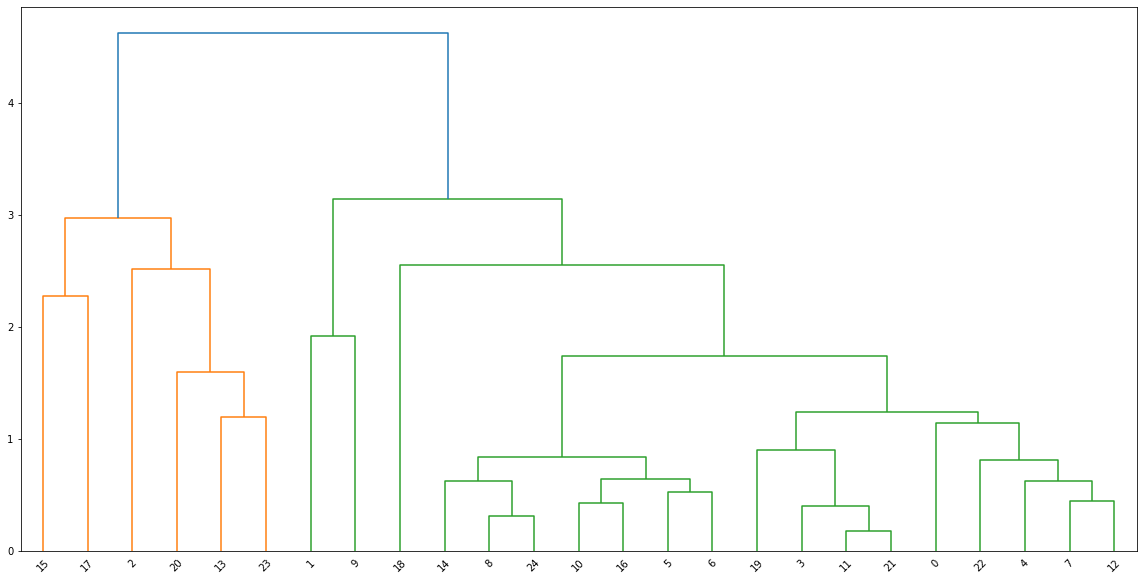

In [339]:
#create dendrogram
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(df2,method='average'))

In [340]:
#create clusters
hc = AgglomerativeClustering(n_clusters = 2,
                            affinity = 'euclidean',
                            linkage = 'average')
hc.fit_predict(uni_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [341]:
hc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [342]:
df2['h_clusterid'] = hc.labels_
df2

,pc1,pc2,pc3,h_clusterid
0,-1.009874,-1.064310,0.081066,0
1,-2.822238,2.259045,0.836829,0
2,1.112466,1.631209,-0.266787,0
3,-0.741741,-0.042187,0.060501,0
4,-0.311912,-0.635244,0.010241,0
5,-1.696691,-0.344363,-0.253408,0
6,-1.246821,-0.490984,-0.032094,0
7,-0.338750,-0.785169,-0.493585,0
8,-2.374150,-0.386539,0.116098,0
9,-1.403277,2.119515,-0.442827,0


In [343]:
df2.sort_values("h_clusterid")

,pc1,pc2,pc3,h_clusterid
0,-1.009874,-1.064310,0.081066,0
22,0.532221,-1.017167,-0.423716,0
21,-0.542289,-0.079589,-0.305393,0
20,1.963183,-0.224768,-0.255881,0
19,-0.097762,0.650446,0.100508,0
18,0.822603,-0.698906,1.427811,0
16,-1.699644,-0.305597,0.318508,0
14,-2.236265,-0.371793,-0.398994,0
11,-0.450857,-0.011133,-0.175746,0
10,-1.726103,0.088237,0.170404,0


In [344]:
df2.groupby('h_clusterid').mean()

,pc1,pc2,pc3
h_clusterid,,,
0,-0.787313,-0.039819,-0.008047
1,4.133391,0.209051,0.042248


In [345]:
df2['h_clusterid'].value_counts()
#this shows 21 universities are in cluster 0 and others are in 1

0    21
1     4
Name: h_clusterid, dtype: int64

# KMeans Clustering

In [346]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score
wcss = []
sil_score = []
cal_haz_score = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
    if i == 1:
        continue
    sil_score.append(silhouette_score(df2,kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(df2,kmeans.labels_))

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [347]:
wcss

[145.49657664069258,
 57.30880634929372,
 37.81647802368288,
 28.73991915376648,
 20.74780417513886,
 17.367463230682475,
 13.769404361140529,
 11.406910093988422,
 9.04259459568084,
 6.687600577109958]

In [348]:
sil_score

[0.5698491177931095,
 0.36788754331568296,
 0.38096086346264707,
 0.37640181281542323,
 0.33775513113367567,
 0.3206325867897922,
 0.3227379065164919,
 0.3227330480037761,
 0.31784201727492173]

In [349]:
cal_haz_score

[35.392792939006505,
 31.321824418585866,
 28.43767924452817,
 30.06312653920131,
 28.034642969496335,
 28.699971797903046,
 28.54816338156426,
 30.180271956499862,
 34.593617063667615]

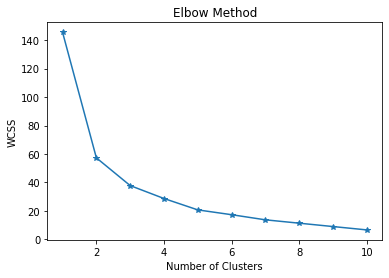

In [350]:
plt.plot(range(1,11),wcss,'*-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [351]:
#Selecting 3 number of cluster
k_clusterid = KMeans(n_clusters = 3,random_state=42)
k_clusterid.fit(df2)

KMeans(n_clusters=3, random_state=42)

In [352]:
k_clusterid.labels_

array([1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 2])

In [353]:
df2["k_clusterid"] = k_clusterid.labels_
df2

,pc1,pc2,pc3,h_clusterid,k_clusterid
0,-1.009874,-1.064310,0.081066,0,1
1,-2.822238,2.259045,0.836829,0,2
2,1.112466,1.631209,-0.266787,0,1
3,-0.741741,-0.042187,0.060501,0,1
4,-0.311912,-0.635244,0.010241,0,1
5,-1.696691,-0.344363,-0.253408,0,2
6,-1.246821,-0.490984,-0.032094,0,2
7,-0.338750,-0.785169,-0.493585,0,1
8,-2.374150,-0.386539,0.116098,0,2
9,-1.403277,2.119515,-0.442827,0,2


In [354]:
df2.groupby('k_clusterid').mean()

,pc1,pc2,pc3,h_clusterid
k_clusterid,,,,
0,4.133391,0.209051,0.042248,1.0
1,0.081460,-0.273835,-0.061458,0.0
2,-1.945677,0.272202,0.063167,0.0


In [355]:
df2['k_clusterid'].value_counts()

1    12
2     9
0     4
Name: k_clusterid, dtype: int64